In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
def isnan(value):
  try:
      import math
      return math.isnan(float(value))
  except:
      return False

def my_int(value):
    if len(value) == 1:
        return int(value)
    value = list(map(str, value.split(',')))
    return int(value[0]) + (int(value[1]) / (10 ** len(str(value[1]))))


In [124]:
def mnk(data_x, data_y, g=0):
    #Взято с: 
    #https://npm.mipt.ru/books/lab-intro/main.pdf

    # s = np.array([[int(s1[i]), int(s1[i + 1])]for i in range(0, len(s1), 2)])
    s = np.array([[data_x[i], data_y[i]] for i in range(len(data_x))])
    sum_x = np.sum([i[0] for i in s])
    sum_y = np.sum([i[1] for i in s])
    sum_xy = np.sum([i[0] * i[1] for i in s])
    sum_xx = np.sum([i[0] * i[0] for i in s])

    a = ((len(s) * sum_xy) - (sum_x * sum_y)) / ((len(s) * sum_xx) - sum_x ** 2)# коэфициэент при x
    b = (sum_y - (a * sum_x)) / len(s)# свободный член


    y_mean = np.mean(sum_y)
    x_mean = np.mean(sum_x)
    D_yy = np.mean((data_y - y_mean) ** 2)
    D_xx = np.mean((data_x - x_mean) ** 2)
    # print(D_xx, D_yy, a)

    if g == 1:
        ga = ((1 / (len(s) - 2)) * (np.abs((D_yy / D_xx) - (a ** 2)))) ** (1/2)# погрешности для коэфициэнтов прямой построенной с помощью МНК
        gb = ga * ((np.mean(data_x ** 2)) ** (1 / 2))
        # print(ga, gb)
        return a, b, ga, gb
    else:
        return a, b

In [125]:
df = pd.read_csv(r'C:\Users\12345\PycharmProjects\Labs\1,2,2\Измерения для лаба 1.2.2 - Лист1.csv')
# print(df.columns)

data = df['bo[rad/sec^2]']
data = [i if not isnan(i) else '0,0' for i in data]
data = [list(map(my_int, i.split('+-'))) for i in data]


data_for_errorbar_y = df['погрешность b0 ср']
data_for_errorbar_y = [i if not isnan(i) else '0,0' for i in data_for_errorbar_y]
data_no = []
for i in data_for_errorbar_y:
    if i != '0,0':
        data_no.append(i)
data_for_errorbar_y = data_no
data_for_errorbar_y = np.array([my_int(i) for i in data_for_errorbar_y])


data_for_errorbar_x = df['погрешность Мн']
data_for_errorbar_x = [i if not isnan(i) else '0,0' for i in data_for_errorbar_x]
data_no = []
for i in data_for_errorbar_x:
    if i != '0,0':
        data_no.append(i)
data_for_errorbar_x = data_no
data_for_errorbar_x = np.array([my_int(i) for i in data_for_errorbar_x]) / (10 ** 5)


# print(data_for_errorbar_y, data_for_errorbar_x)

69.22763774187007 -0.08286895340788725 7.43953286077903 0.13715603680275704


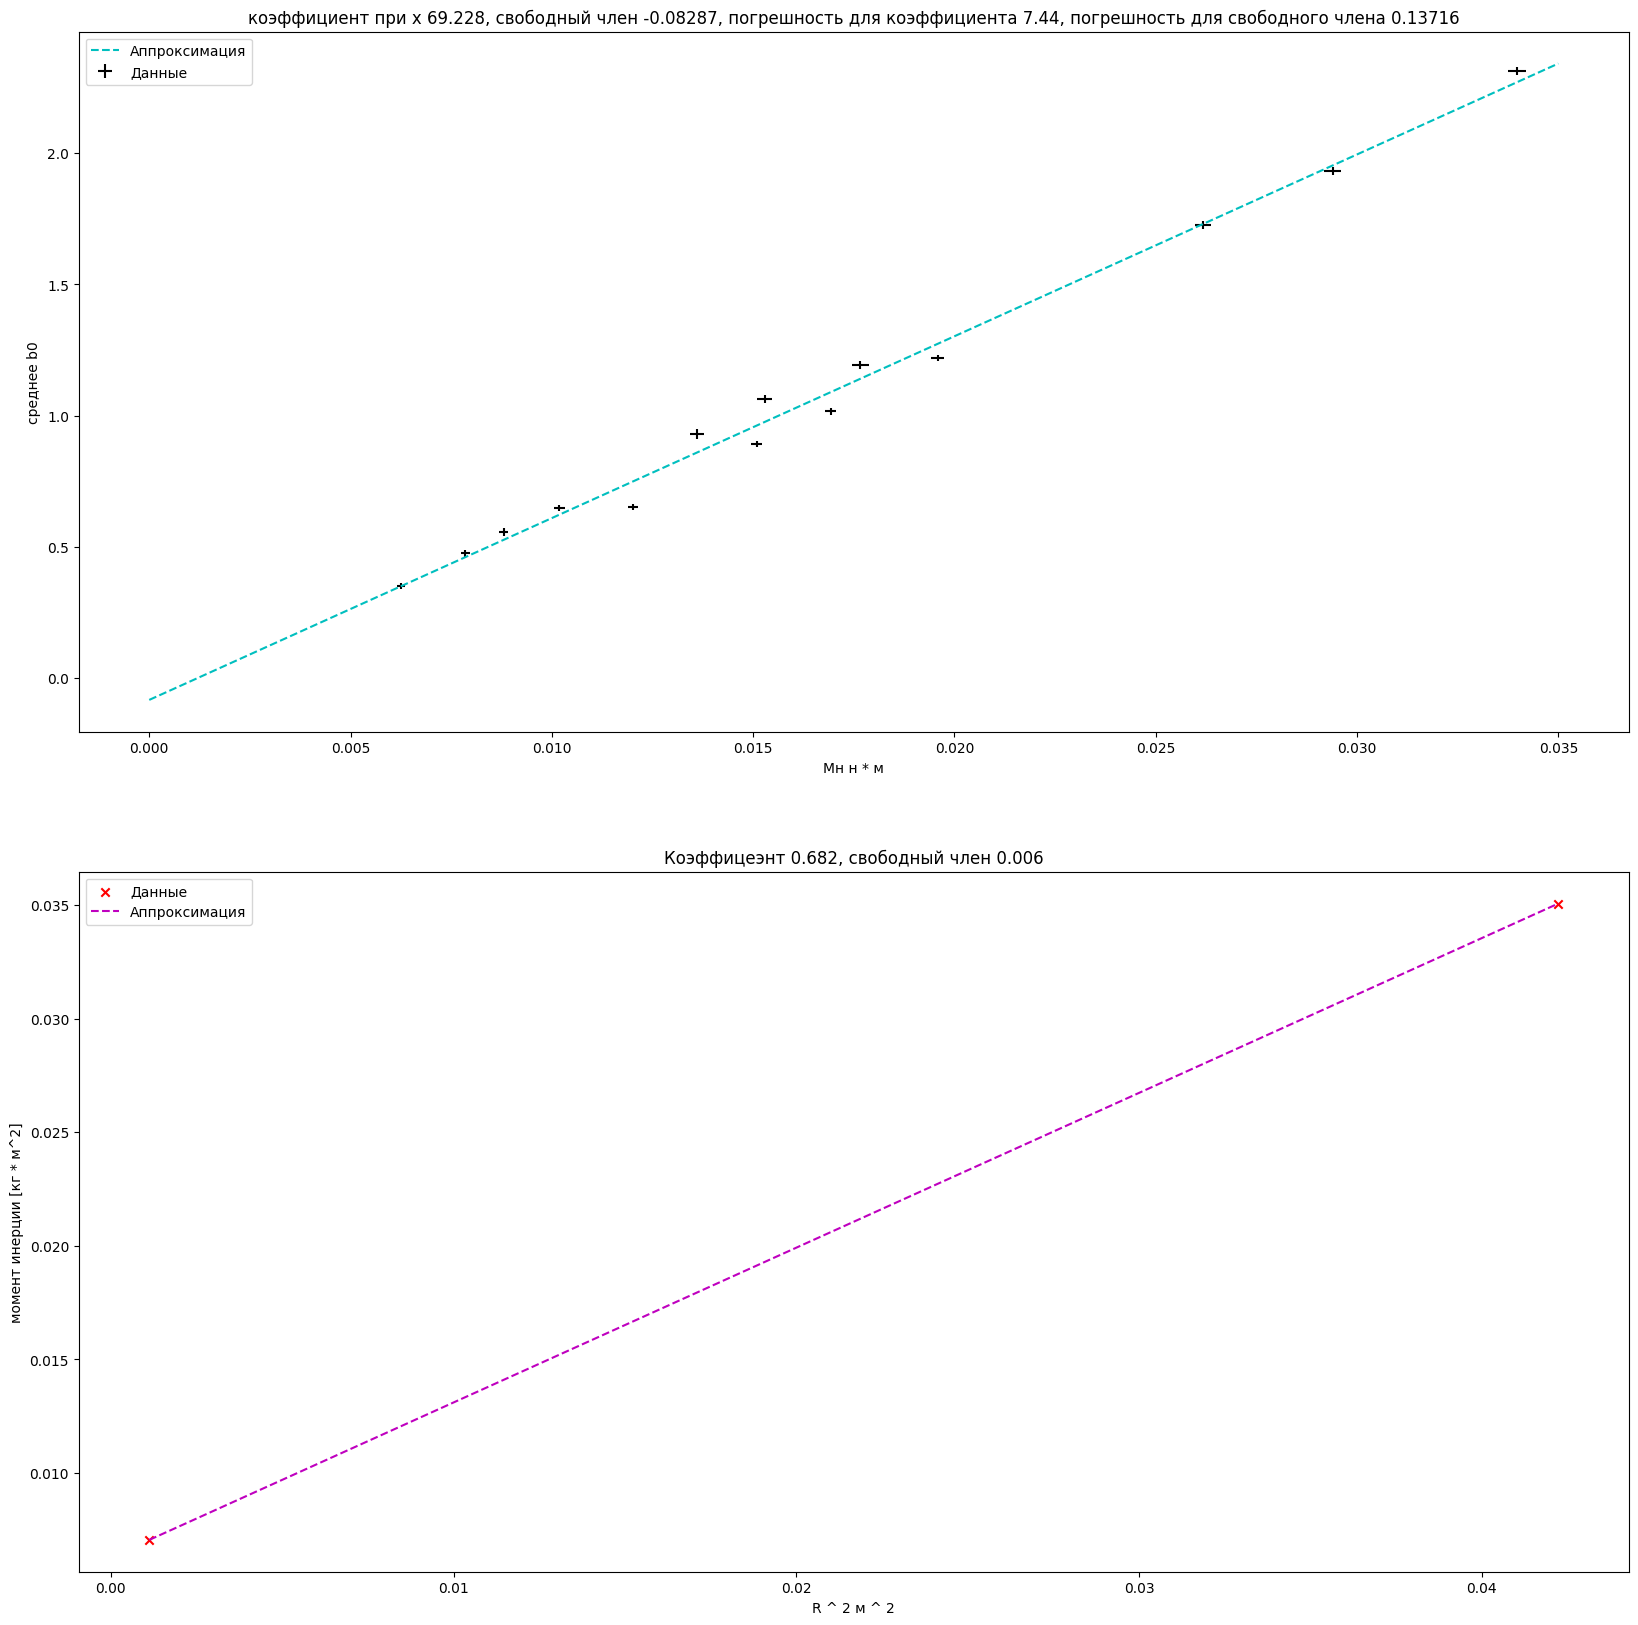

In [128]:
plt.figure(figsize=(20,20))
data_y = np.array([0.6525, 0.3493, 0.891, 0.4752, 1.0163, 0.5555, 1.2192, 
                   0.6486, 1.7247, 0.9296, 1.93075, 1.061, 2.3113, 1.192])#среднее b0
data_x = np.array([1202.215, 625.1518, 1509.2,784.784, 1692.705, 880.2066, 
                   1958.53, 1018.4356, 2617.09, 1360.8868, 2939.51, 1528.5452, 3397.415,1766.6558])#Мн н * м
data_x = data_x / (100000)

ax1 = plt.subplot2grid((2, 1), (0, 0))
xh1 = np.linspace(0, 0.035, 100)
approximation_1 = np.polyfit(data_x, data_y, 1)
approximation_data_1 = np.poly1d(approximation_1)

k, b, gk, gb = mnk(data_x, data_y, 1)
print(k, b, gk, gb)


ax1.errorbar(data_x, data_y, data_for_errorbar_y, data_for_errorbar_x, color = 'k', linestyle = 'None', label="Данные")
ax1.plot(xh1, approximation_data_1(xh1),'c--', label="Аппроксимация")
ax1.set_title(f'коэффициент при x {round(k, 3)}, свободный член {round(b, 5)}, погрешность для коэффициента {round(gk, 3)}, погрешность для свободного члена {round(gb, 5)}')
ax1.set_xlabel('Мн н * м')
ax1.set_ylabel('среднее b0')
ax1.legend()


data_y2 = [0.03507, 0.007039]
data_x2 = [0.04223, 0.0011222]
approximation_2 = np.polyfit(data_x2, data_y2, 1)
approximation_data_2 = np.poly1d(approximation_2)
ax2 = plt.subplot2grid((2, 1), (1, 0))
xh2 = np.linspace(np.min(data_x2), np.max(data_x2), 100)

ax2.scatter(data_x2, data_y2, marker='x', color='red', label='Данные')
ax2.plot(xh2, approximation_data_2(xh2),'m--', label="Аппроксимация")
k, b = mnk(data_x2, data_y2)
ax2.set_xlabel('R ^ 2 м ^ 2')
ax2.set_ylabel('момент инерции [кг * м^2]')
# print(k,b)
ax2.set_title(f'Коэффицеэнт {round(k, 3)}, свободный член {round(b, 3)}')
ax2.legend()

plt.savefig('mygraph.pdf', dpi=1200)
